In [1]:
from helper_functions import *
import seaborn as sns

# dataset description
* "time" -- records the date and time of production
* "green -- bar was green("1") or not green("0")
* rest are oompa-loompdas names

In [10]:
df = pd.read_csv("../data/Scrumpulicious.csv")
y = df['GREEN']

df = df.drop(['TIME','GREEN'], axis=1)
df.head()

,PIB,MOZ,NOL,ZEN,SIP,MAZ,FOK,BIN,SIG,ZEV,...,FUG,NIT,SIM,DUB,ZIR,RUP,LEM,GIS,POF,SUG
0,0.49185,3.80995,2.15806,25.09738,-0.01918,-17.64035,0.06206,-0.09259,0.00782,-0.00761,...,24.26228,-2.25524,4.16916,4.27578,0.01312,2.97603,-0.77726,-0.00917,0.02302,0.00835
1,-0.14336,3.86365,2.17636,24.60226,0.00093,-21.96503,0.05610,-0.08650,-0.00295,-0.04997,...,24.30858,-2.25231,4.15313,4.27571,0.00866,4.42526,-0.86524,-0.00934,0.57344,0.00835
2,-0.14263,3.64129,2.15806,26.12899,0.02104,-23.74379,0.05154,-0.08650,-0.01310,-0.07511,...,24.35487,-2.24939,4.13736,4.27564,0.01416,4.42958,-0.97301,-0.00951,1.17828,0.00835
3,-0.14813,2.95535,2.28731,29.98923,0.04114,-24.46509,0.05154,-0.08650,-0.00526,-0.08436,...,24.40117,-2.24641,4.12160,4.27557,0.01219,4.33068,-0.76113,-0.00967,1.12441,0.00835
4,-0.22327,2.93920,2.22378,31.09300,0.06125,-25.58076,0.05154,-0.07578,-0.00526,-0.08436,...,24.44726,-2.24349,4.10557,4.27550,0.00319,4.48351,-0.97301,-0.00984,-0.02715,0.00835


### Checking for correlation between columns


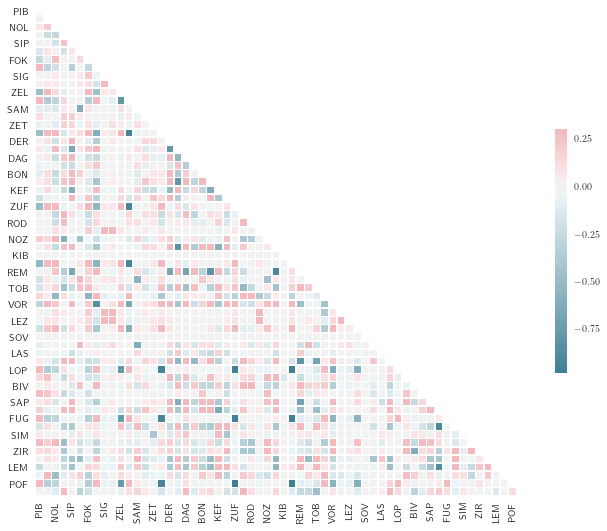

In [11]:
corr_heatmap(df)

### Checking for correlation between columns AFTER getting rid of some columns


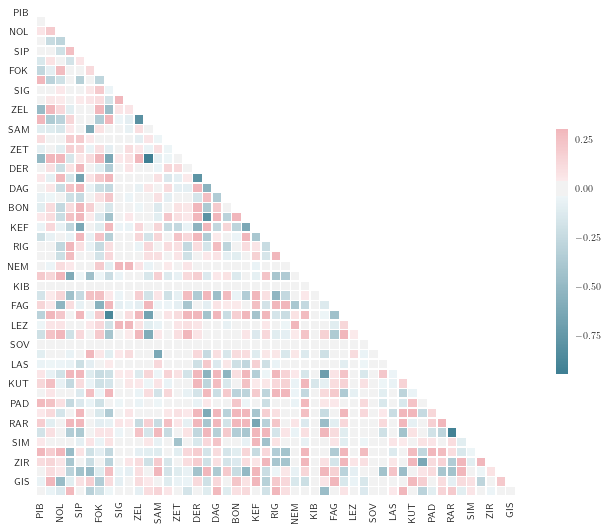

In [12]:
uncorr_df = correlation(df, 0.8)
X = np.array(uncorr_df)
corr_heatmap(uncorr_df)

# Checking if any columns are from the normal distribution

In [13]:
a = [st.normaltest(X[:,i])[1] for i in range(X.shape[1])]
alpha = 0.05
print((np.array(a)<alpha).all())

True


#### Hence non are from the normal distribution

## Using PCA to preview the data

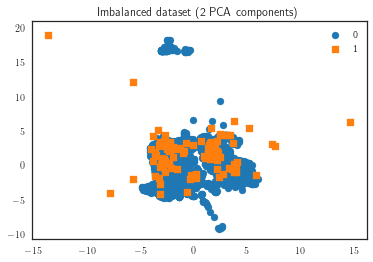

In [14]:
X = standardize_data(X)
pca = PCA(n_components=2)
X = pca.fit_transform(X)

plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')

------

# Training and building models
   Using SVM and Random Forest classifiers
    1. On an imbalanced dataset 
    2. On a balanced dataset using oversampling techinques

# Imbalanced dataset

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


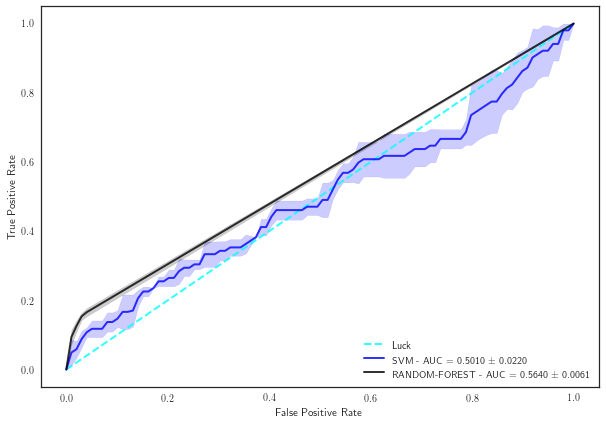

,Model,accuracy,recall,precision,f1-score,param 1,param 2
0,SVM,0.9935468+/-0.0000007,0.0+/-0,0.0+/-0,0.9967629+/-0.0000004,0.001,10
0,RANDOM-FOREST,0.99336+/-0.00033,0.5+/-0.4,0.039+/-0.017,0.99069+/-0.00018,8.000,100


In [17]:
SVM_1_performance, SVM_1_roc = model(X, y,
                                     n_splits=3, seed=42,
                                     model_name='SVM',
                                    over_sampling = False)
RM_1_performance, RM_1_roc = model(X, y,
                                   n_splits=3, seed=42,
                                   model_name='RANDOM-FOREST',
                                   over_sampling = False)
plot_roc([SVM_1_roc, RM_1_roc])
result = pd.concat([SVM_1_performance, RM_1_performance])
result

The performance is quite poor, let's try to use sampling techniques to better train our model

# balanced (oversampled) dataset
#### dropping SVM as it has really poor results, but on the other hand Random Forst reduces overfitting 
1.  First using cross validation, I will gry to get the best hyperparamters
2. Using the best hyperparamters, I will train a seperate model. This require the right approach to over sampling. Where we have a hold out test set

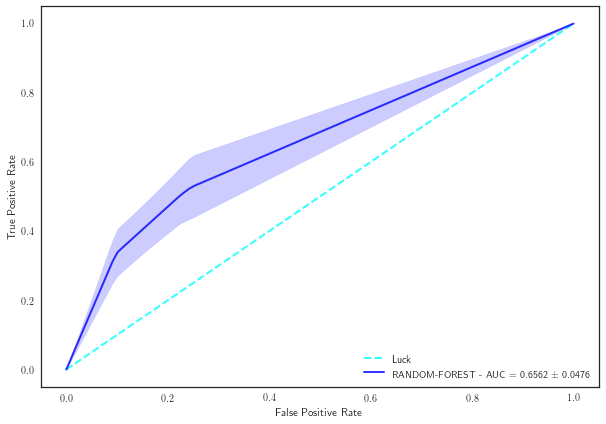

,Model,accuracy,recall,precision,f1-score,param 1,param 2
0,RANDOM-FOREST,0.899+/-0.004,0.022+/-0.005,0.33+/-0.08,0.9409+/-0.0020,2,100


In [19]:
RM_1_performance, RM_1_roc = model(X, y,
                                   n_splits=3, seed=42,
                                   model_name='RANDOM-FOREST',
                                   over_sampling = True)
plot_roc([ RM_1_roc])
RM_1_performance

## Correct way to oversampling knowing the best hyperparameters

In [20]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(ratio='minority')

In [21]:
# First split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Then split again to oversample only on the training
# not on the validation nore test set

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
#over-sample
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)
print(np.unique(y_train_res, return_counts=True))

(array([0, 1]), array([10050, 10050]))


In [23]:
#TRAIN
clf_rf = RandomForestClassifier(n_estimators = 100,
                                max_depth = 2,
                                random_state= 42)
clf_rf.fit(x_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [24]:
#metrics
#X_test, y_test = sm.fit_sample(X_test, y_test)
print ('Validation Results')
y_pred_val = clf_rf.predict(X_val)
print ("accuracy: ", clf_rf.score(X_val, y_val))
print ("recll: ",recall_score(y_val, clf_rf.predict(X_val)))
print("classification report:",classification_report(y_val, y_pred_val)) 

print ('\nTest Results')
y_pred_test = clf_rf.predict(X_test)
print ("accuracy: ", clf_rf.score(X_test, y_test))
print ("recll: ", recall_score(y_test, clf_rf.predict(X_test)))
print("classification report:",classification_report(y_test, y_pred_test)) 

Validation Results
accuracy:  0.77500988533017
recll:  0.5
classification report:               precision    recall  f1-score   support

           0       0.99      0.78      0.87      2509
           1       0.02      0.50      0.03        20

   micro avg       0.78      0.78      0.78      2529
   macro avg       0.51      0.64      0.45      2529
weighted avg       0.99      0.78      0.87      2529


Test Results
accuracy:  0.7745098039215687
recll:  0.35294117647058826
classification report:               precision    recall  f1-score   support

           0       1.00      0.78      0.87      3145
           1       0.01      0.35      0.02        17

   micro avg       0.77      0.77      0.77      3162
   macro avg       0.50      0.56      0.44      3162
weighted avg       0.99      0.77      0.87      3162

